In [1]:
!pip install scikit-learn
!pip install deepface

import os
import numpy as np
import pandas as pd
import tensorflow as tf
from deepface import DeepFace
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.model_selection import train_test_split


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 6.3 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=34c1db57d463b2d5781af841d1d3f21e45766d12f01a24bafafe556374e1d84d
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire
Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [2]:
main_folder_path = r'/content/drive/MyDrive/face_dataset'

folders_name = []

for file_path in os.listdir(main_folder_path) :
   folders_name.append(file_path)

print(folders_name)

complete_path_each_folder = []
for i in range(len(folders_name)):
  path = main_folder_path +"/"+ folders_name[i]
  complete_path_each_folder.append(path)


print(complete_path_each_folder)

['Siavash_Ghomayshi', 'Mohsen_Chavoshi', 'Siamak_Ansari', 'Taraneh_Alidoosti', 'Parviz_Parastooee', 'Tannaz_Tabatabaee', 'Parinaz_Izadyar', 'Mehran_Modiri', 'Shahab_Hosseini', 'Parsa_Pirozfar', 'Mahnaz_Afshar', 'Javad_Razavian', 'Hootan_Shakiba', 'Golshifteh_Farahani', 'Javad_Khiabani', 'Elnaz_Shakerdoost', 'Hamid_Lolaei', 'Leyla_Hatami', 'Mehran_Ghafourian', 'Asghar_Farhadi', 'Behnam_Bani', 'Bahare_Rahnama', 'Dariush_Arjmand', 'Ebi', 'Ehsan_Alikhani', 'Elham_Hamidi', 'Ali_Khamenei', 'Bahram_Radan', 'Ali_Daei', 'Adel_FerdowsiPour']
['/content/drive/MyDrive/face_dataset/Siavash_Ghomayshi', '/content/drive/MyDrive/face_dataset/Mohsen_Chavoshi', '/content/drive/MyDrive/face_dataset/Siamak_Ansari', '/content/drive/MyDrive/face_dataset/Taraneh_Alidoosti', '/content/drive/MyDrive/face_dataset/Parviz_Parastooee', '/content/drive/MyDrive/face_dataset/Tannaz_Tabatabaee', '/content/drive/MyDrive/face_dataset/Parinaz_Izadyar', '/content/drive/MyDrive/face_dataset/Mehran_Modiri', '/content/drive/M

In [3]:
def generate_dataset(path):
    embedding_obj_features = DeepFace.represent(img_path= path , model_name="ArcFace" , enforce_detection=False)
    return embedding_obj_features


dicti = defaultdict(list)

for k in range(1,len(folders_name)) :

  folder_path = complete_path_each_folder[k]
  print(folder_path)
  pictures_name = []
  for file_path in os.listdir(folder_path) :
    pictures_name.append(file_path)
  complete_path = []
  for p in range(len(pictures_name)):
    path = folder_path +"/"+ pictures_name[p]
    complete_path.append(path)

  for j in range(len(pictures_name)) :
      face_feature_numbers = generate_dataset(complete_path[j])
      dicti['Label'].append( folders_name[k])
      dicti['File_name'].append(pictures_name[j] )

      for i in range(len(face_feature_numbers[0]["embedding"])) :
            dicti[f'Feature{i+1}'].append(face_feature_numbers[0]["embedding"][i])

  for j in range(len(pictures_name)) :
      dicti['facial_area_x'].append( face_feature_numbers[0]["facial_area"]['x'] )
      dicti['facial_area_y'].append( face_feature_numbers[0]["facial_area"]['y'] )
      dicti['facial_area_w'].append( face_feature_numbers[0]["facial_area"]['w'] )
      dicti['facial_area_h'].append( face_feature_numbers[0]["facial_area"]['h'] )

  print(k)


/content/drive/MyDrive/face_dataset/Mohsen_Chavoshi
arcface_weights.h5  will be downloaded to  /root/.deepface/weights/arcface_weights.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/arcface_weights.h5
To: /root/.deepface/weights/arcface_weights.h5
100%|██████████| 137M/137M [00:01<00:00, 131MB/s]


1
/content/drive/MyDrive/face_dataset/Siamak_Ansari
2
/content/drive/MyDrive/face_dataset/Taraneh_Alidoosti
3
/content/drive/MyDrive/face_dataset/Parviz_Parastooee
4
/content/drive/MyDrive/face_dataset/Tannaz_Tabatabaee
5
/content/drive/MyDrive/face_dataset/Parinaz_Izadyar
6
/content/drive/MyDrive/face_dataset/Mehran_Modiri
7
/content/drive/MyDrive/face_dataset/Shahab_Hosseini
8
/content/drive/MyDrive/face_dataset/Parsa_Pirozfar
9
/content/drive/MyDrive/face_dataset/Mahnaz_Afshar
10
/content/drive/MyDrive/face_dataset/Javad_Razavian
11
/content/drive/MyDrive/face_dataset/Hootan_Shakiba
12
/content/drive/MyDrive/face_dataset/Golshifteh_Farahani
13
/content/drive/MyDrive/face_dataset/Javad_Khiabani
14
/content/drive/MyDrive/face_dataset/Elnaz_Shakerdoost
15
/content/drive/MyDrive/face_dataset/Hamid_Lolaei
16
/content/drive/MyDrive/face_dataset/Leyla_Hatami
17
/content/drive/MyDrive/face_dataset/Mehran_Ghafourian
18
/content/drive/MyDrive/face_dataset/Asghar_Farhadi
19
/content/drive/MyDr

In [4]:
df = pd.DataFrame(dicti)
df

,Label,File_name,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,...,Feature507,Feature508,Feature509,Feature510,Feature511,Feature512,facial_area_x,facial_area_y,facial_area_w,facial_area_h
0,Mohsen_Chavoshi,had-2-1.jpg,-0.228952,0.951086,-0.203697,-0.608225,-0.074953,0.409610,-0.257860,-0.147588,...,0.395525,-0.364882,-0.052314,0.100540,-0.493635,-1.548347,37,49,185,185
1,Mohsen_Chavoshi,1009692_696-0.jpg,0.035257,0.386757,0.029509,-0.012572,0.053531,0.303221,-0.096137,0.200985,...,0.133130,-0.034062,0.121669,0.060103,0.198958,0.058110,37,49,185,185
2,Mohsen_Chavoshi,07a4e1ffd93ef486458aaf3fa9e8d04c-1.jpg,-0.009070,0.258685,-0.370173,-0.200726,0.273365,0.324034,-0.143019,0.198906,...,0.152789,0.069055,0.292986,0.244903,-0.101145,0.037874,37,49,185,185
3,Mohsen_Chavoshi,1085962_833-0.jpg,-0.124223,0.222831,-0.038276,-0.180284,-0.032707,0.198348,-0.106725,-0.187446,...,0.011145,-0.048671,0.049894,0.083708,-0.231877,-0.239438,37,49,185,185
4,Mohsen_Chavoshi,136241136-talab-org-1.jpg,0.039725,0.145160,-0.029640,-0.109939,0.196220,0.098547,0.143201,0.273114,...,0.311432,0.208741,0.287455,0.238627,0.035870,-0.029638,37,49,185,185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1689,Adel_FerdowsiPour,عادل-فردوسی-پور (6)-0.jpg,-0.141964,0.542851,-0.227236,-0.685712,0.026499,0.446663,-0.297418,-0.060012,...,0.327718,-0.322656,-0.057698,-0.074868,-0.361016,-1.230080,44,56,169,169
1690,Adel_FerdowsiPour,عادل-1.jpg,0.030934,0.178007,0.008224,-0.448691,-0.116571,-0.133304,-0.004937,0.005144,...,0.007477,-0.135152,0.240736,0.174155,0.154795,0.138386,44,56,169,169
1691,Adel_FerdowsiPour,پروژه-جدید-عادل-فردوسی-پور-لو-40189-0.jpg,-0.156412,0.154691,-0.174399,-0.210756,-0.000593,-0.171219,0.126310,0.269909,...,0.324418,-0.091930,0.023726,0.092342,-0.331123,0.255593,44,56,169,169
1692,Adel_FerdowsiPour,adel-ferdosipor-0.jpg,-0.010954,-0.028167,-0.134022,-0.443336,0.058053,-0.348779,0.042720,0.058560,...,0.084808,-0.215836,0.173205,-0.144916,0.081418,0.160442,44,56,169,169


In [5]:
df.to_csv("/content/drive/MyDrive/dataset.csv")

In [6]:
df.iloc[: , 2:]

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature507,Feature508,Feature509,Feature510,Feature511,Feature512,facial_area_x,facial_area_y,facial_area_w,facial_area_h
0,-0.228952,0.951086,-0.203697,-0.608225,-0.074953,0.409610,-0.257860,-0.147588,0.030488,-0.028145,...,0.395525,-0.364882,-0.052314,0.100540,-0.493635,-1.548347,37,49,185,185
1,0.035257,0.386757,0.029509,-0.012572,0.053531,0.303221,-0.096137,0.200985,-0.223911,-0.189143,...,0.133130,-0.034062,0.121669,0.060103,0.198958,0.058110,37,49,185,185
2,-0.009070,0.258685,-0.370173,-0.200726,0.273365,0.324034,-0.143019,0.198906,-0.287234,-0.104407,...,0.152789,0.069055,0.292986,0.244903,-0.101145,0.037874,37,49,185,185
3,-0.124223,0.222831,-0.038276,-0.180284,-0.032707,0.198348,-0.106725,-0.187446,-0.078146,-0.170190,...,0.011145,-0.048671,0.049894,0.083708,-0.231877,-0.239438,37,49,185,185
4,0.039725,0.145160,-0.029640,-0.109939,0.196220,0.098547,0.143201,0.273114,-0.288442,-0.081513,...,0.311432,0.208741,0.287455,0.238627,0.035870,-0.029638,37,49,185,185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1689,-0.141964,0.542851,-0.227236,-0.685712,0.026499,0.446663,-0.297418,-0.060012,-0.139155,0.012551,...,0.327718,-0.322656,-0.057698,-0.074868,-0.361016,-1.230080,44,56,169,169
1690,0.030934,0.178007,0.008224,-0.448691,-0.116571,-0.133304,-0.004937,0.005144,0.001206,-0.045898,...,0.007477,-0.135152,0.240736,0.174155,0.154795,0.138386,44,56,169,169
1691,-0.156412,0.154691,-0.174399,-0.210756,-0.000593,-0.171219,0.126310,0.269909,0.028059,-0.207978,...,0.324418,-0.091930,0.023726,0.092342,-0.331123,0.255593,44,56,169,169
1692,-0.010954,-0.028167,-0.134022,-0.443336,0.058053,-0.348779,0.042720,0.058560,0.006159,-0.112544,...,0.084808,-0.215836,0.173205,-0.144916,0.081418,0.160442,44,56,169,169


In [7]:
labels_array = df["Label"].unique()
labels_array

array(['Mohsen_Chavoshi', 'Siamak_Ansari', 'Taraneh_Alidoosti',
       'Parviz_Parastooee', 'Tannaz_Tabatabaee', 'Parinaz_Izadyar',
       'Mehran_Modiri', 'Shahab_Hosseini', 'Parsa_Pirozfar',
       'Mahnaz_Afshar', 'Javad_Razavian', 'Hootan_Shakiba',
       'Golshifteh_Farahani', 'Javad_Khiabani', 'Elnaz_Shakerdoost',
       'Hamid_Lolaei', 'Leyla_Hatami', 'Mehran_Ghafourian',
       'Asghar_Farhadi', 'Behnam_Bani', 'Bahare_Rahnama',
       'Dariush_Arjmand', 'Ebi', 'Ehsan_Alikhani', 'Elham_Hamidi',
       'Ali_Khamenei', 'Bahram_Radan', 'Ali_Daei', 'Adel_FerdowsiPour'],
      dtype=object)

In [12]:
df['num_label'] = 0
for i in range(len(df)) :
  for j in range(len(labels_array)):
    if df['Label'][i] == labels_array[j]:
      df['num_label'][i] = j

df

,Label,File_name,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,...,Feature508,Feature509,Feature510,Feature511,Feature512,facial_area_x,facial_area_y,facial_area_w,facial_area_h,num_label
0,Mohsen_Chavoshi,had-2-1.jpg,-0.228952,0.951086,-0.203697,-0.608225,-0.074953,0.409610,-0.257860,-0.147588,...,-0.364882,-0.052314,0.100540,-0.493635,-1.548347,37,49,185,185,0
1,Mohsen_Chavoshi,1009692_696-0.jpg,0.035257,0.386757,0.029509,-0.012572,0.053531,0.303221,-0.096137,0.200985,...,-0.034062,0.121669,0.060103,0.198958,0.058110,37,49,185,185,0
2,Mohsen_Chavoshi,07a4e1ffd93ef486458aaf3fa9e8d04c-1.jpg,-0.009070,0.258685,-0.370173,-0.200726,0.273365,0.324034,-0.143019,0.198906,...,0.069055,0.292986,0.244903,-0.101145,0.037874,37,49,185,185,0
3,Mohsen_Chavoshi,1085962_833-0.jpg,-0.124223,0.222831,-0.038276,-0.180284,-0.032707,0.198348,-0.106725,-0.187446,...,-0.048671,0.049894,0.083708,-0.231877,-0.239438,37,49,185,185,0
4,Mohsen_Chavoshi,136241136-talab-org-1.jpg,0.039725,0.145160,-0.029640,-0.109939,0.196220,0.098547,0.143201,0.273114,...,0.208741,0.287455,0.238627,0.035870,-0.029638,37,49,185,185,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1689,Adel_FerdowsiPour,عادل-فردوسی-پور (6)-0.jpg,-0.141964,0.542851,-0.227236,-0.685712,0.026499,0.446663,-0.297418,-0.060012,...,-0.322656,-0.057698,-0.074868,-0.361016,-1.230080,44,56,169,169,28
1690,Adel_FerdowsiPour,عادل-1.jpg,0.030934,0.178007,0.008224,-0.448691,-0.116571,-0.133304,-0.004937,0.005144,...,-0.135152,0.240736,0.174155,0.154795,0.138386,44,56,169,169,28
1691,Adel_FerdowsiPour,پروژه-جدید-عادل-فردوسی-پور-لو-40189-0.jpg,-0.156412,0.154691,-0.174399,-0.210756,-0.000593,-0.171219,0.126310,0.269909,...,-0.091930,0.023726,0.092342,-0.331123,0.255593,44,56,169,169,28
1692,Adel_FerdowsiPour,adel-ferdosipor-0.jpg,-0.010954,-0.028167,-0.134022,-0.443336,0.058053,-0.348779,0.042720,0.058560,...,-0.215836,0.173205,-0.144916,0.081418,0.160442,44,56,169,169,28


In [13]:
df.iloc[ :, 2:-5]

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature503,Feature504,Feature505,Feature506,Feature507,Feature508,Feature509,Feature510,Feature511,Feature512
0,-0.228952,0.951086,-0.203697,-0.608225,-0.074953,0.409610,-0.257860,-0.147588,0.030488,-0.028145,...,-1.406813,0.309182,0.525859,-1.047908,0.395525,-0.364882,-0.052314,0.100540,-0.493635,-1.548347
1,0.035257,0.386757,0.029509,-0.012572,0.053531,0.303221,-0.096137,0.200985,-0.223911,-0.189143,...,-0.033646,0.119648,0.121239,-0.315565,0.133130,-0.034062,0.121669,0.060103,0.198958,0.058110
2,-0.009070,0.258685,-0.370173,-0.200726,0.273365,0.324034,-0.143019,0.198906,-0.287234,-0.104407,...,-0.119659,0.078409,0.165411,-0.047563,0.152789,0.069055,0.292986,0.244903,-0.101145,0.037874
3,-0.124223,0.222831,-0.038276,-0.180284,-0.032707,0.198348,-0.106725,-0.187446,-0.078146,-0.170190,...,-0.142089,0.004026,0.338304,-0.246621,0.011145,-0.048671,0.049894,0.083708,-0.231877,-0.239438
4,0.039725,0.145160,-0.029640,-0.109939,0.196220,0.098547,0.143201,0.273114,-0.288442,-0.081513,...,0.031257,0.105603,0.164402,0.057011,0.311432,0.208741,0.287455,0.238627,0.035870,-0.029638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1689,-0.141964,0.542851,-0.227236,-0.685712,0.026499,0.446663,-0.297418,-0.060012,-0.139155,0.012551,...,-1.283675,0.091136,0.420855,-0.787464,0.327718,-0.322656,-0.057698,-0.074868,-0.361016,-1.230080
1690,0.030934,0.178007,0.008224,-0.448691,-0.116571,-0.133304,-0.004937,0.005144,0.001206,-0.045898,...,0.044609,0.141386,0.344279,-0.019049,0.007477,-0.135152,0.240736,0.174155,0.154795,0.138386
1691,-0.156412,0.154691,-0.174399,-0.210756,-0.000593,-0.171219,0.126310,0.269909,0.028059,-0.207978,...,0.096915,-0.231741,0.396812,-0.063599,0.324418,-0.091930,0.023726,0.092342,-0.331123,0.255593
1692,-0.010954,-0.028167,-0.134022,-0.443336,0.058053,-0.348779,0.042720,0.058560,0.006159,-0.112544,...,0.122291,-0.011275,0.233996,-0.011789,0.084808,-0.215836,0.173205,-0.144916,0.081418,0.160442


In [14]:

X_train = np.array(df.iloc[: , 2:-5])
Y_train = np.array(df["num_label"])


x_train ,  x_test , y_train , y_test = train_test_split(X_train ,Y_train ,  test_size=0.2)
y_test = y_test.reshape(-1 , 1)
y_train = y_train.reshape(-1 , 1)
print(x_train.shape , y_train.shape , x_test.shape , y_test.shape )

x_train , x_test = x_train / 255.0 , x_test / 255.0


(1355, 512) (1355, 1) (339, 512) (339, 1)


In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512 ),
    tf.keras.layers.Dense(256 , activation= "relu" ),
    tf.keras.layers.Dense(128 , activation= "relu" ),
    tf.keras.layers.Dense(29  , activation= "softmax")
    ])


model.compile(optimizer="adamax" , loss=tf.keras.losses.sparse_categorical_crossentropy , metrics="accuracy")
mymodel = model.fit(x_train , y_train , epochs=300)
loss , accuracy = model.evaluate(x_test , y_test )
print("TEST LOSS" , loss)
print("TEST ACCURACY" , accuracy)

Epoch 1/300
43/43 [==============================] - 5s 5ms/step - loss: 3.3555 - accuracy: 0.0694
Epoch 2/300
43/43 [==============================] - 0s 3ms/step - loss: 3.3058 - accuracy: 0.0627
Epoch 3/300
43/43 [==============================] - 0s 3ms/step - loss: 3.2406 - accuracy: 0.0790
Epoch 4/300
43/43 [==============================] - 0s 4ms/step - loss: 3.1863 - accuracy: 0.0952
Epoch 5/300
43/43 [==============================] - 0s 4ms/step - loss: 3.1305 - accuracy: 0.1100
Epoch 6/300
43/43 [==============================] - 0s 4ms/step - loss: 3.0689 - accuracy: 0.1528
Epoch 7/300
43/43 [==============================] - 0s 3ms/step - loss: 2.9923 - accuracy: 0.1225
Epoch 8/300
43/43 [==============================] - 0s 3ms/step - loss: 2.9112 - accuracy: 0.1852
Epoch 9/300
43/43 [==============================] - 0s 4ms/step - loss: 2.8247 - accuracy: 0.2074
Epoch 10/300
43/43 [==============================] - 0s 3ms/step - loss: 2.7358 - accuracy: 0.2384
Epoch 11/

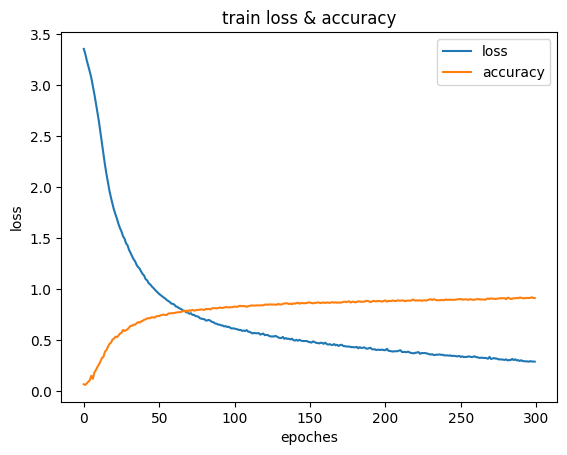

In [16]:
plt.plot(mymodel.history["loss"] )
plt.plot( mymodel.history["accuracy"])
plt.xlabel("epoches")
plt.ylabel("loss")
plt.title("train loss & accuracy")
plt.legend(["loss" , "accuracy"])
plt.show()

### Test an image

In [43]:
def generate_dataset():
    embedding_obj_features = DeepFace.represent(img_path="/content/drive/MyDrive/face_dataset/Leyla_Hatami/Leyla-Hatami-07_01.jpg" , model_name="ArcFace" , enforce_detection=False)
    return embedding_obj_features

face_feature_numbers = generate_dataset()

test_img =np.array( face_feature_numbers[0]["embedding"] )
test_img = test_img.reshape(1 ,-1)

pred = model.predict(test_img)
print(pred)

pred = np.argmax(pred)
print(pred)

print(labels_array[pred])


(1, 512)
1/1 [==============================] - 0s 24ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
16
Leyla_Hatami
